#### **Análisis academico estudiantes primer semestre**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('../data_raw/dataset.csv')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,5,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,10,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,10,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,5,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


**Extraer características**

In [3]:
firstSemester_features = df.loc[df['Target']=='Graduate',['Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)',
                                                         'Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)',
                                                         'Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)']]

In [4]:
firstSemester_features.describe()

,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations)
count,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000
mean,0.847442,6.669534,8.276596,6.232232,12.643655,0.088275
std,2.686148,2.664579,3.809908,2.583380,2.699027,0.589686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,6.000000,5.000000,12.121429,0.000000
50%,0.000000,6.000000,8.000000,6.000000,13.000000,0.000000
75%,0.000000,7.000000,9.000000,7.000000,13.857143,0.000000
max,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000


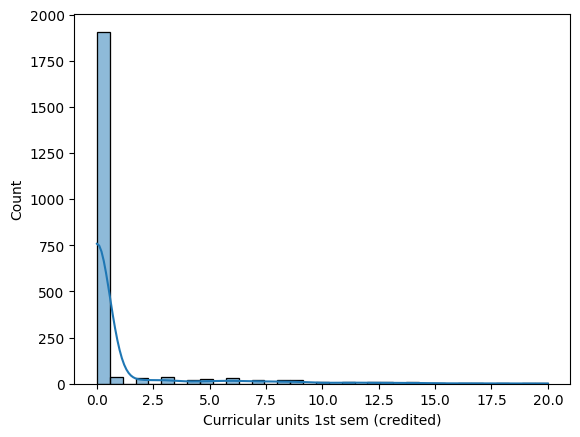

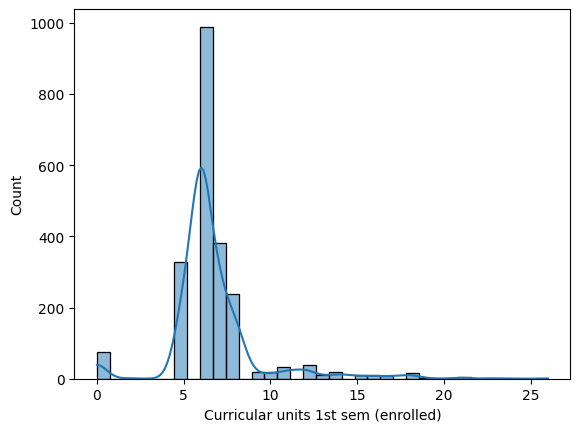

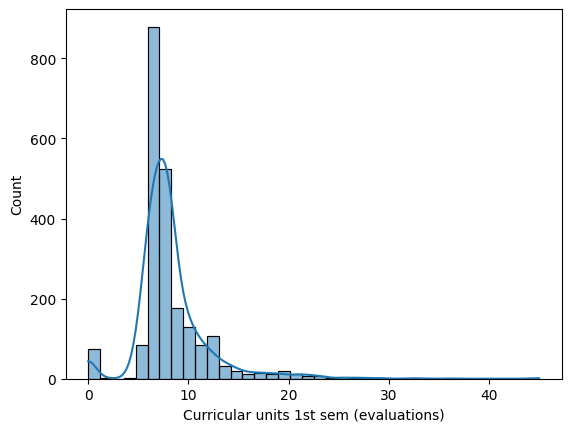

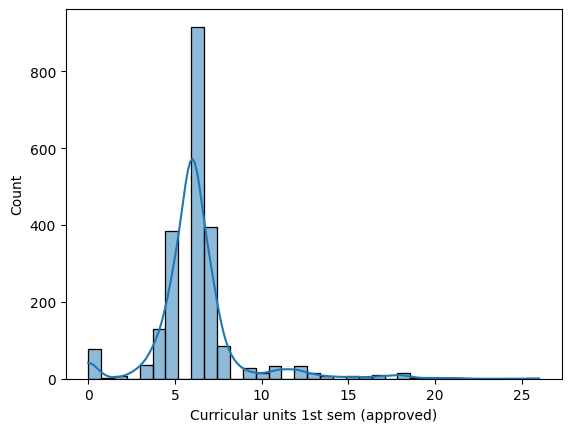

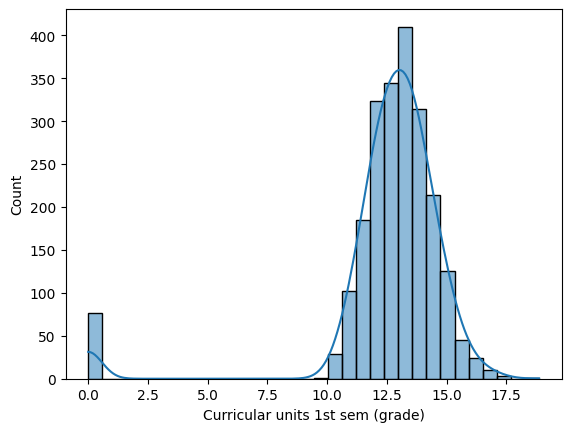

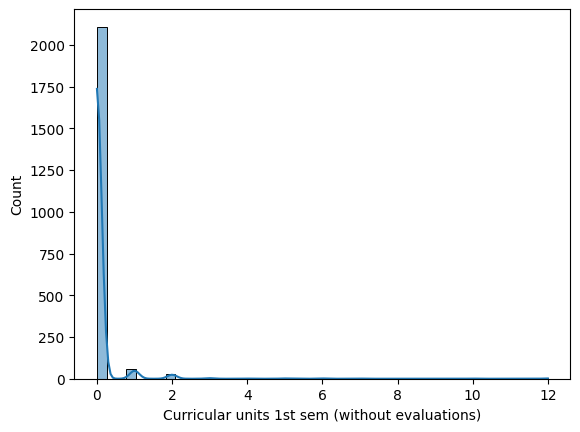

In [5]:
for i in firstSemester_features.columns:
    sns.histplot(data=firstSemester_features, x=i, kde=True, bins=len(i))
    plt.show()

Observaciones:
- La gran mayoría de los estudiantes no tiene creditos.
- Cursaron entre 5-7 asignaturas (mas o menos).
- En promedio se han evaluado 8 unidades.
- En promedio se han aprobado 6 unidades.
- La mayoria de las calificaciones son aprobados.

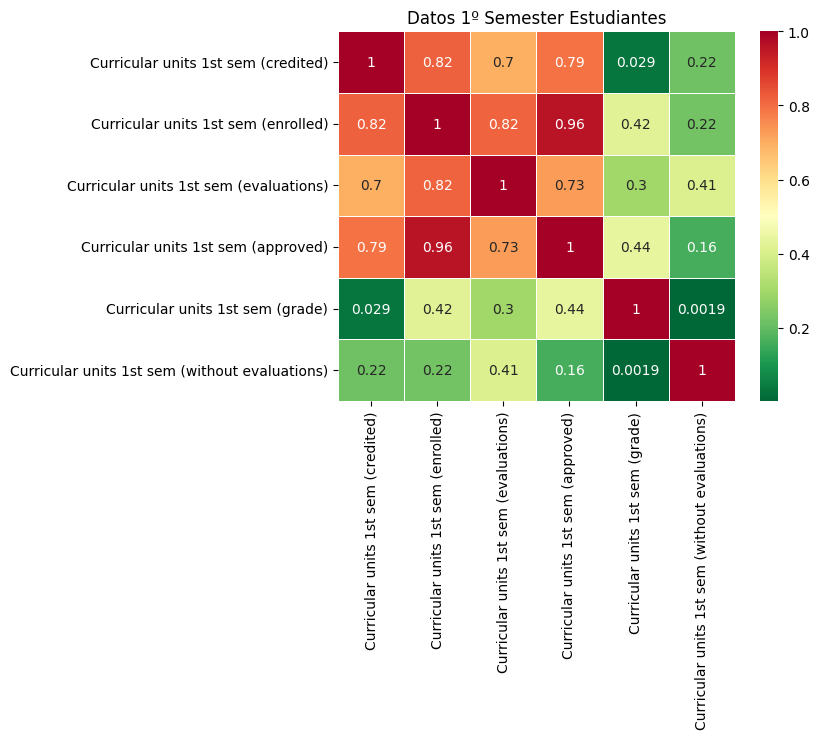

In [6]:
# Mapa de correlaciones entre caractersticas
firstSemester_corr = firstSemester_features.corr()
#mask = np.triu(np.ones_like(firstSemester_corr, dtype=bool))
sns.heatmap(data=firstSemester_corr,cmap='RdYlGn_r', annot=True, linewidths=.5)
plt.title('Datos 1º Semester Estudiantes')
plt.show()

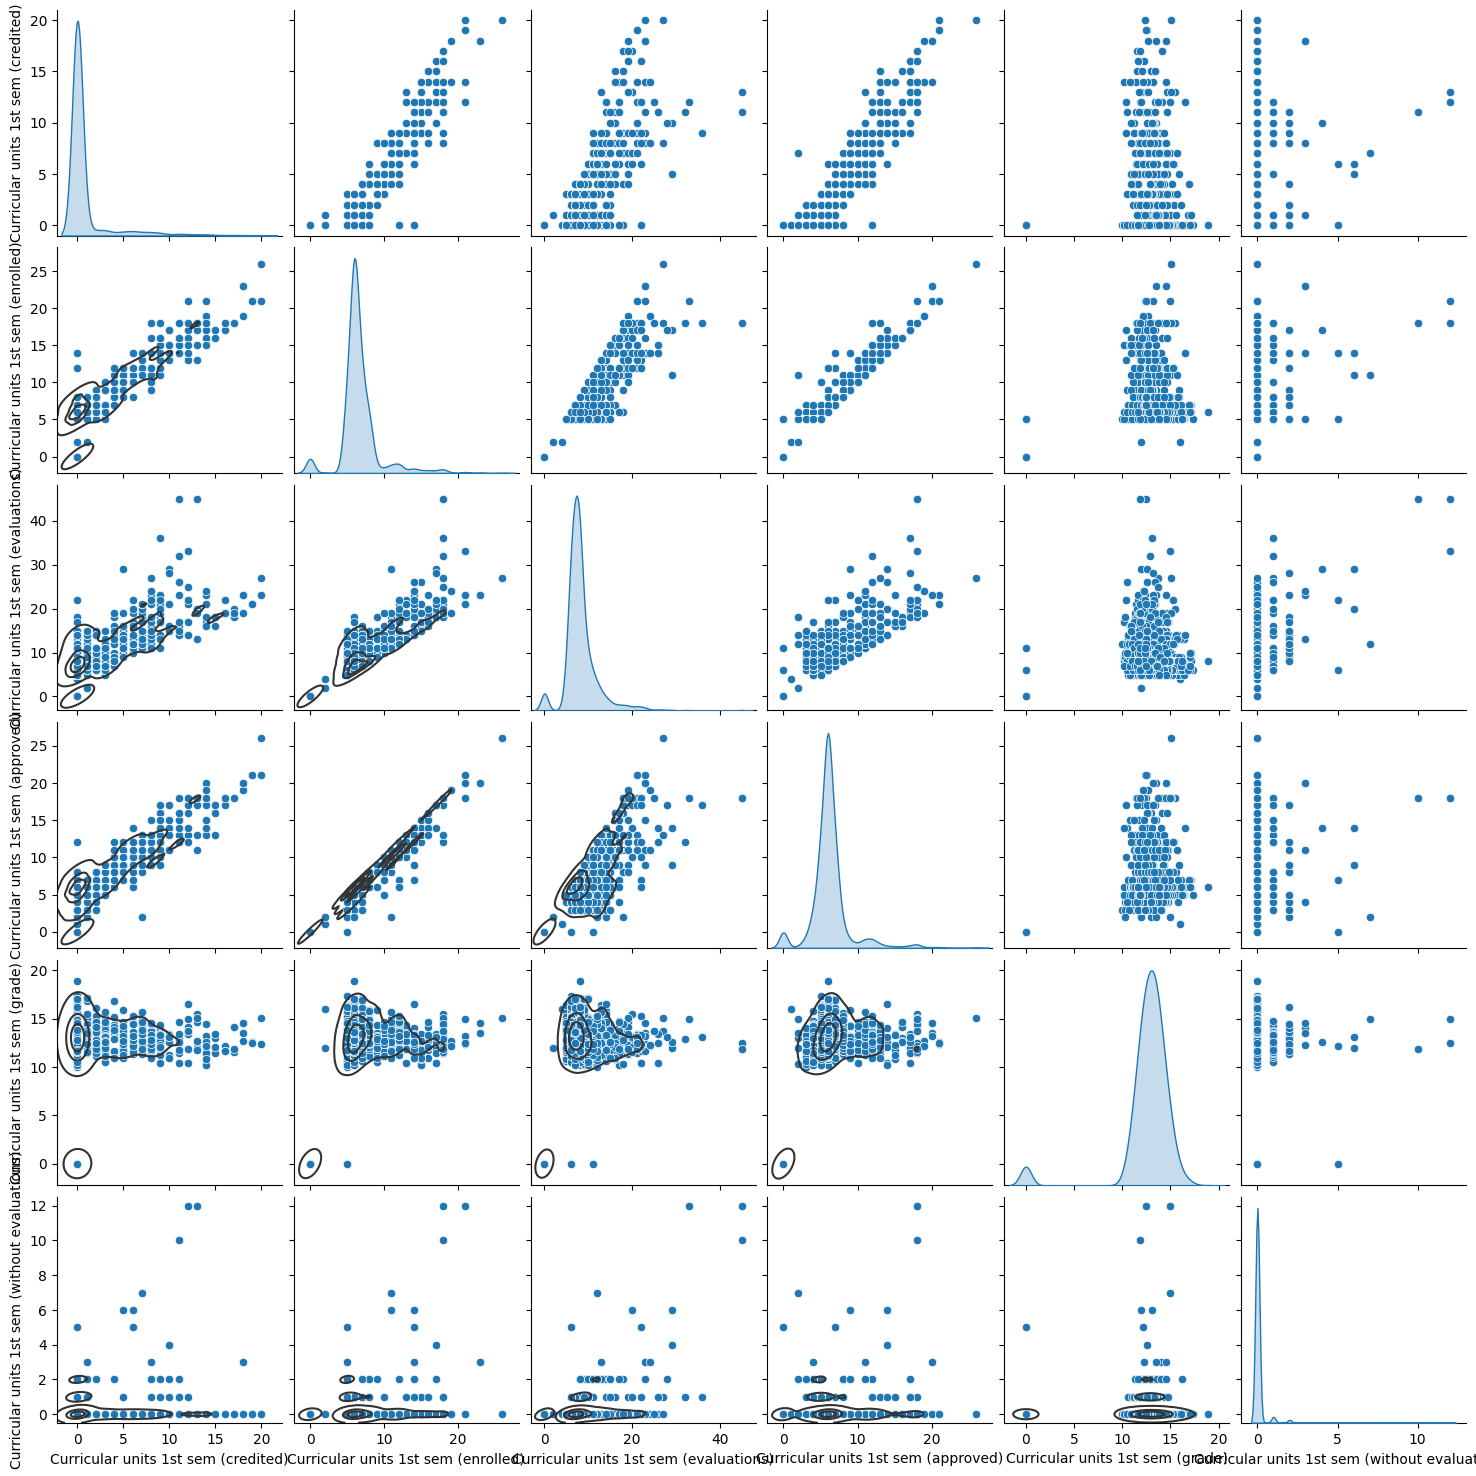

In [7]:
g=sns.pairplot(firstSemester_features, diag_kind='kde')
g.map_lower(sns.kdeplot, levels=4, color=".2")

Observaciones:
- La correlacion entre credited y enrolled muestra como los estudiantes tienden a obtener creditos conforme unidades inscritas están.
- Conforme aprueban, van obteniendo creditos (algunas asignaturas parecen no creditadas).
- Practicamente encontramos la misma cantidad de unidades inscritas como aprobadas (tienden a aprobar todas las asignaturas).
- el numero de unidades aprobadas no difiere de una calificación mayor (encontramos casos donde aprueban 10 asignaturas con un suficiente en la calificación).